### Step 1: Importing Required Libraries and Data


In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [2]:
df1 = pd.read_csv("D:\\upGrad\\DS\\Assignments\\Lead Score\\Leads.csv")

In [3]:
df = df1.copy()

### Step 2: Inspecting the Dataframe

In [4]:
# Let's see the head of our master dataset
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
# dimensions of the dataframe
df.shape

(9240, 37)

In [6]:
#Statistical aspects of the dataframe
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
#Type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### Step 3: Data Cleaning

In [8]:
#Replace select with np.nan
df.replace("Select", np.nan, inplace=True)

In [9]:
#percentage of missing values
for cols in df.columns:
    if df[cols].isnull().sum() / df[cols].shape[0] > 0 :
        print(cols, ((df[cols].isnull().sum()) / df[cols].shape[0])*100)
    

Lead Source 0.38961038961038963
TotalVisits 1.4826839826839828
Page Views Per Visit 1.4826839826839828
Last Activity 1.1147186147186148
Country 26.634199134199132
Specialization 36.58008658008658
How did you hear about X Education 78.46320346320347
What is your current occupation 29.11255411255411
What matters most to you in choosing a course 29.318181818181817
Tags 36.28787878787879
Lead Quality 51.590909090909086
Lead Profile 74.18831168831169
City 39.70779220779221
Asymmetrique Activity Index 45.64935064935065
Asymmetrique Profile Index 45.64935064935065
Asymmetrique Activity Score 45.64935064935065
Asymmetrique Profile Score 45.64935064935065


Variables like 'How did you hear about X Education', 'Lead Quality', 'Lead Profile',  'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'City ', 'Tags','Specialization' and 'Asymmetrique Profile Score' have extremely high missing values. It is recommended to drop variables with more than 35% of missing values. 

In [10]:
#drop all the above mentioned variables
drop_cols = ['How did you hear about X Education', 'Lead Quality', 
             'Lead Profile', 'Asymmetrique Activity Index', 'City', 'Tags', 
             'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 
             'Asymmetrique Profile Score' , 'Last Notable Activity', 'Last Activity',  
              'Specialization']
df = df.drop(drop_cols, axis= 1)

In [11]:
#Creating a list of categorical variables
categ_cols = ['Country', 'Lead Source', 'What is your current occupation',
              'Lead Origin', 'What matters most to you in choosing a course']

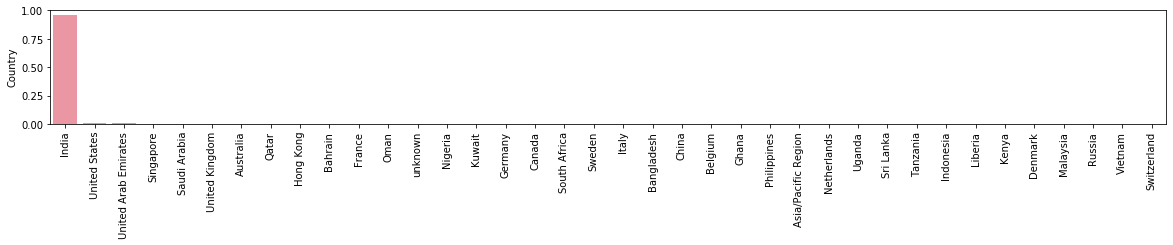

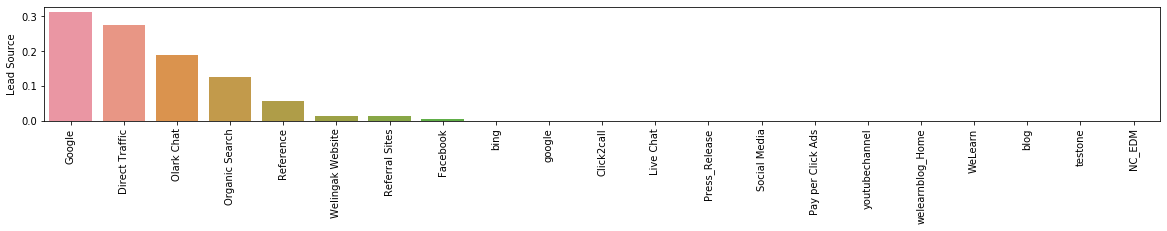

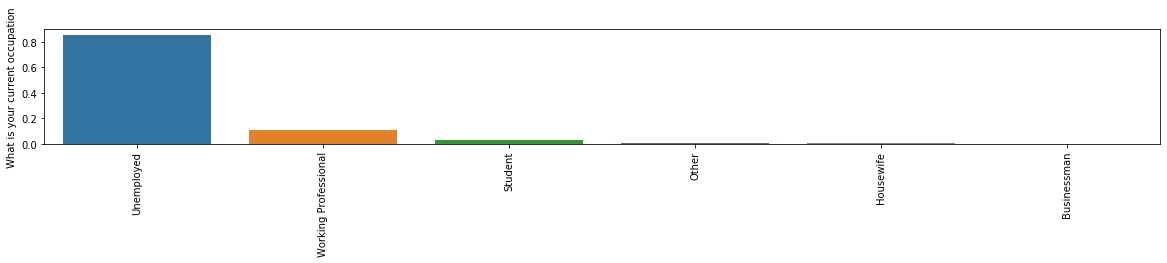

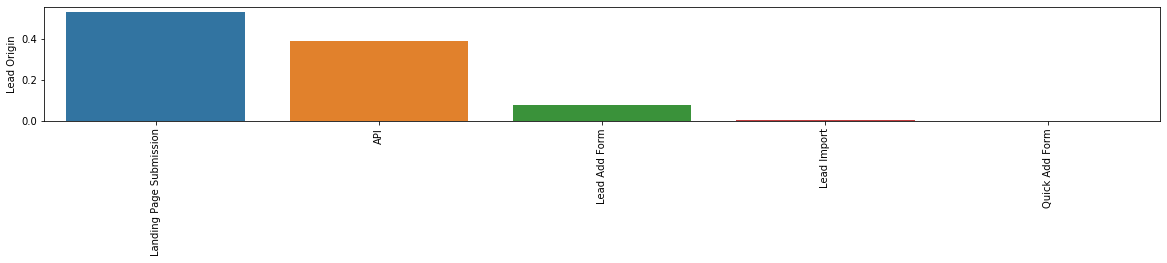

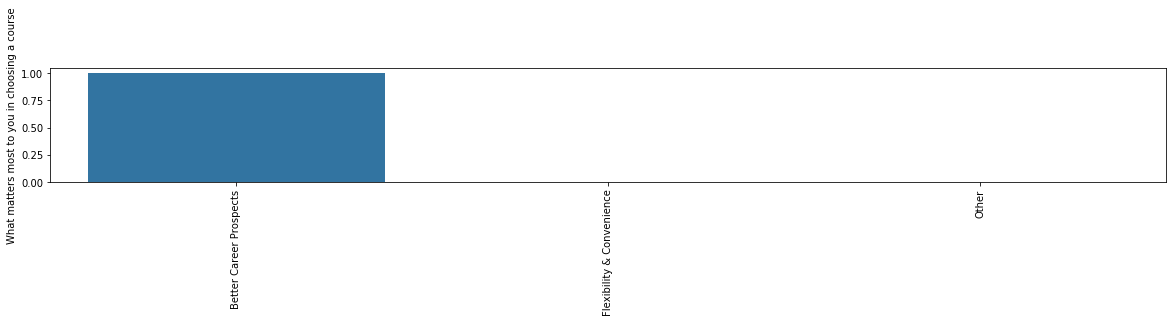

In [12]:
#Percentage Count plot of the categorical variables
for i, col in enumerate(categ_cols):
    plt.figure(figsize=(20,50))
    plt.subplot(20,1,i+1)
    sns.barplot(df[col].value_counts().index, df[col].value_counts(normalize=True))
    plt.xticks(rotation=90)

* The country column is skewed. Hence, it should be dropped. 
* While the columns have a many categories. For which all the categories with less than 5% of values can be stored in single variable named "others". 

In [13]:
#List categorical Variables that have very small categorical variables
others_cat = ['Lead Source', 'What is your current occupation', 'Lead Origin', 
             'What matters most to you in choosing a course']

In [14]:
#grouping small categorical variables into a single "others" category   
for col in others_cat:
    change = df[col].value_counts(normalize=True)[df[col].value_counts(normalize=True) < 0.05]
    for cat in change.index:
        df.replace(cat, "other", inplace=True)


In [15]:
#drop country Variable as it is skewed
df.drop("Country", axis=1, inplace=True)

In [16]:
#Rows with missing values and their percentage
for row in df.index:
    if df.iloc[row, :].isnull().sum() / df.shape[1] > 0.3:
        print(row)

There are no row with more than 30% missing values. Hence, nothing needs to be done.

The last two categorical columns need to be imputed using mode. 

In [17]:
#replace missing with mode
df['What is your current occupation'].fillna(df['What is your current occupation'].mode()[0], inplace=True)

In [18]:
#replace missing with mode
df['What matters most to you in choosing a course'].fillna(df['What matters most to you in choosing a course'].mode()[0], inplace=True)

In [19]:
df.dropna(inplace=True)

In [20]:
#percentage of missing values
for cols in df.columns:
    if df[cols].isnull().sum() / df[cols].shape[0] > 0 :
        print(cols, ((df[cols].isnull().sum()) / df[cols].shape[0])*100)
    

As we have deal with all the missing values by removing or imputing . Hence there are no more missing values remaining. 

In [21]:
#Percentage of rows left after dealing with missing values
(df.shape[0] / df1.shape[0])*100

98.2034632034632

More than 98% of rows are still present in the data. 

### Treating Outliers

In [22]:
#create a set of numerical columns
num_cols = set(df._get_numeric_data().columns)

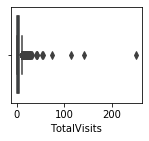

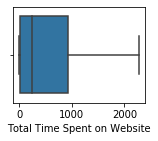

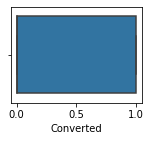

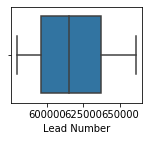

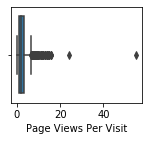

In [23]:
f= num_cols
for col in enumerate(f):
    plt.figure(figsize=(8,6))
    plt.subplot(3, 3, col[0]+1)
    sns.boxplot(df[col[1]])

In [24]:
df.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000
mean,617032.619352,0.378554,3.456028,482.887481,2.370151
std,23348.029512,0.485053,4.858802,545.256560,2.160871
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596406.000000,0.000000,1.000000,11.000000,1.000000
50%,615278.500000,0.000000,3.000000,246.000000,2.000000
75%,637176.500000,1.000000,5.000000,922.750000,3.200000
90%,650276.800000,1.000000,7.000000,1373.000000,5.000000
95%,655344.450000,1.000000,10.000000,1557.000000,6.000000
99%,659563.350000,1.000000,17.000000,1839.000000,9.000000


As we have outliers in TotalVisits and Page Views Per Visit variables. we can deal with them by the help of soft capping. 

In [25]:
#soft Capping of Totalvisits variable
q1 = df.TotalVisits.quantile(0.95)
df.TotalVisits[df.TotalVisits >q1] = q1

In [26]:
#soft Capping of Page Views Per Visit variable
q1 = df['Page Views Per Visit'].quantile(0.95)
df['Page Views Per Visit'][df['Page Views Per Visit'] >q1] = q1

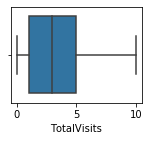

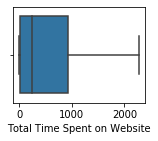

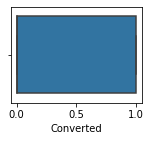

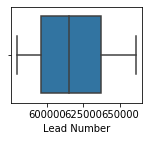

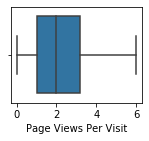

In [27]:
for col in enumerate(num_cols):
    plt.figure(figsize=(8,6))
    plt.subplot(3, 3, col[0]+1)
    sns.boxplot(df[col[1]])

### Step 4: Data Preparation

### Converting some binary variables (Yes/No) to 0/1

In [28]:
#creating a list of variables that have binary values
binary_list = []
for i in df.columns:
    if df[i][0] == "Yes" or df[i][0] == "No":
        binary_list.append(i)
binary_list

['Do Not Email',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview']

In [29]:
# Defining the map function
def binary_map(x):
    return x.map({"Yes" : 1, "No" : 0})
df[binary_list] = df[binary_list].apply(binary_map) 

# Applying the function to the Data Frame
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,0,0,0,0,0,0,0,0,0,1
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,0,0,0,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 24 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9074 non-null   object 
 1   Lead Number                                    9074 non-null   int64  
 2   Lead Origin                                    9074 non-null   object 
 3   Lead Source                                    9074 non-null   object 
 4   Do Not Email                                   9074 non-null   int64  
 5   Do Not Call                                    9074 non-null   int64  
 6   Converted                                      9074 non-null   int64  
 7   TotalVisits                                    9074 non-null   float64
 8   Total Time Spent on Website                    9074 non-null   int64  
 9   Page Views Per Visit                           9074 

In [31]:
#create a set of numerical columns
num_cols1 = set(df._get_numeric_data().columns)

In [32]:
#create a set of categorical columns 
cols = set(df.columns)
obj_cols = cols.difference(num_cols1)

In [33]:
#create a list of categorical columns
cat_cols = []
for cols in obj_cols:
    if (df[cols].value_counts()[1]) > 1:
        cat_cols.append(cols)

#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [34]:
# Creating a dummy variable for some of the categorical variables 
# and dropping the first one
dummy1 = pd.get_dummies(df[cat_cols], drop_first=True)

# Adding the results to the master dataframe
df = pd.concat([df, dummy1], axis=1)

In [35]:
df.head(1)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Lead Origin_Lead Add Form,Lead Origin_other,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_other,What is your current occupation_Working Professional,What is your current occupation_other,What matters most to you in choosing a course_other
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,0,0,0,1,0,0,0,0,0,0


In [36]:
# We have created dummies for all the categorical variables, so we can drop them
df = df.drop(cat_cols, axis=1)

In [37]:
df.shape

(9074, 31)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 31 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Prospect ID                                           9074 non-null   object 
 1   Lead Number                                           9074 non-null   int64  
 2   Do Not Email                                          9074 non-null   int64  
 3   Do Not Call                                           9074 non-null   int64  
 4   Converted                                             9074 non-null   int64  
 5   TotalVisits                                           9074 non-null   float64
 6   Total Time Spent on Website                           9074 non-null   int64  
 7   Page Views Per Visit                                  9074 non-null   float64
 8   Search                                                9074

All the variables are now numeric except Prospect ID

In [39]:
#Percentage of rows left after dealing with missing values
(df.shape[0] / df1.shape[0])*100

98.2034632034632

### Step 5: Test-Train Split


In [40]:
# Putting feature variable to X
X = df.drop(['Prospect ID', 'Converted'], axis=1)
X.head()

,Lead Number,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,...,Lead Origin_Lead Add Form,Lead Origin_other,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_other,What is your current occupation_Working Professional,What is your current occupation_other,What matters most to you in choosing a course_other
0,660737,0,0,0.0,0,0.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,660728,0,0,5.0,674,2.5,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,660727,0,0,2.0,1532,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,660719,0,0,1.0,305,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,660681,0,0,2.0,1428,1.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [41]:
# Putting response variable to y
y = df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [42]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Step 6: Feature Scaling

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
scaler = StandardScaler()

X_train[['Lead Number', 'Page Views Per Visit', 'Total Time Spent on Website','TotalVisits']] = scaler.fit_transform(X_train[['Lead Number', 'Page Views Per Visit','Total Time Spent on Website', 'TotalVisits']])

X_train.head()

,Lead Number,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,...,Lead Origin_Lead Add Form,Lead Origin_other,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_other,What is your current occupation_Working Professional,What is your current occupation_other,What matters most to you in choosing a course_other
3009,0.596345,0,0,-0.432779,-0.160255,-0.155018,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,1.388774,1,0,-0.432779,-0.540048,-0.155018,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9226,-1.608557,0,0,-1.150329,-0.888650,-1.265540,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4750,-0.123109,0,0,-0.432779,1.643304,-0.155018,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7987,-1.225818,0,0,0.643547,2.017593,0.122613,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Step 7: Looking at Correlations

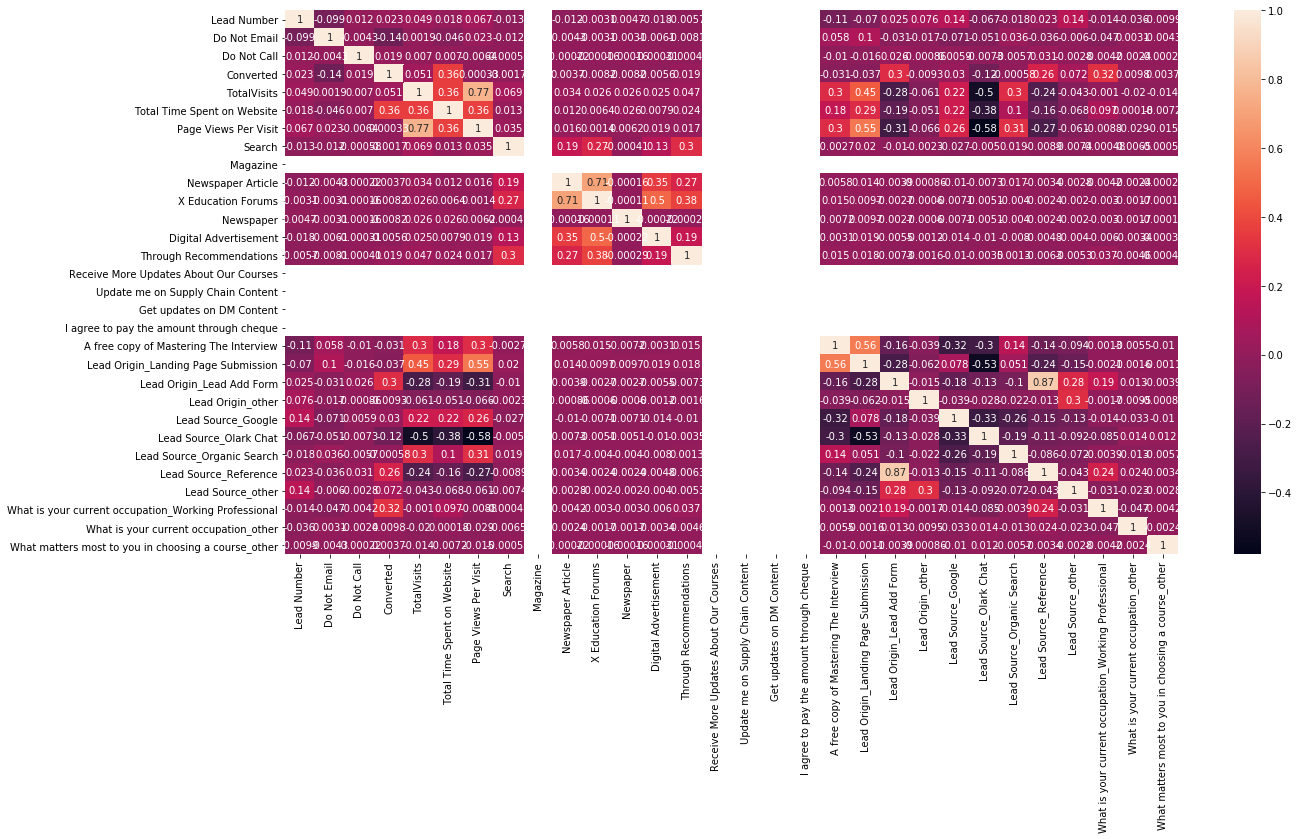

In [45]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(), annot=True)

In [46]:
X_test = X_test.drop(['Lead Origin_other', 'Lead Source_other', 'Lead Source_Olark Chat', 'Receive More Updates About Our Courses',
                      'What is your current occupation_other', 'Lead Origin_Lead Add Form','What matters most to you in choosing a course_other'], 1)

X_train = X_train.drop(['Lead Origin_other', 'Lead Source_other', 'Lead Source_Olark Chat', 'Receive More Updates About Our Courses',
                       'What is your current occupation_other', 'Lead Origin_Lead Add Form', 'What matters most to you in choosing a course_other'], 1)

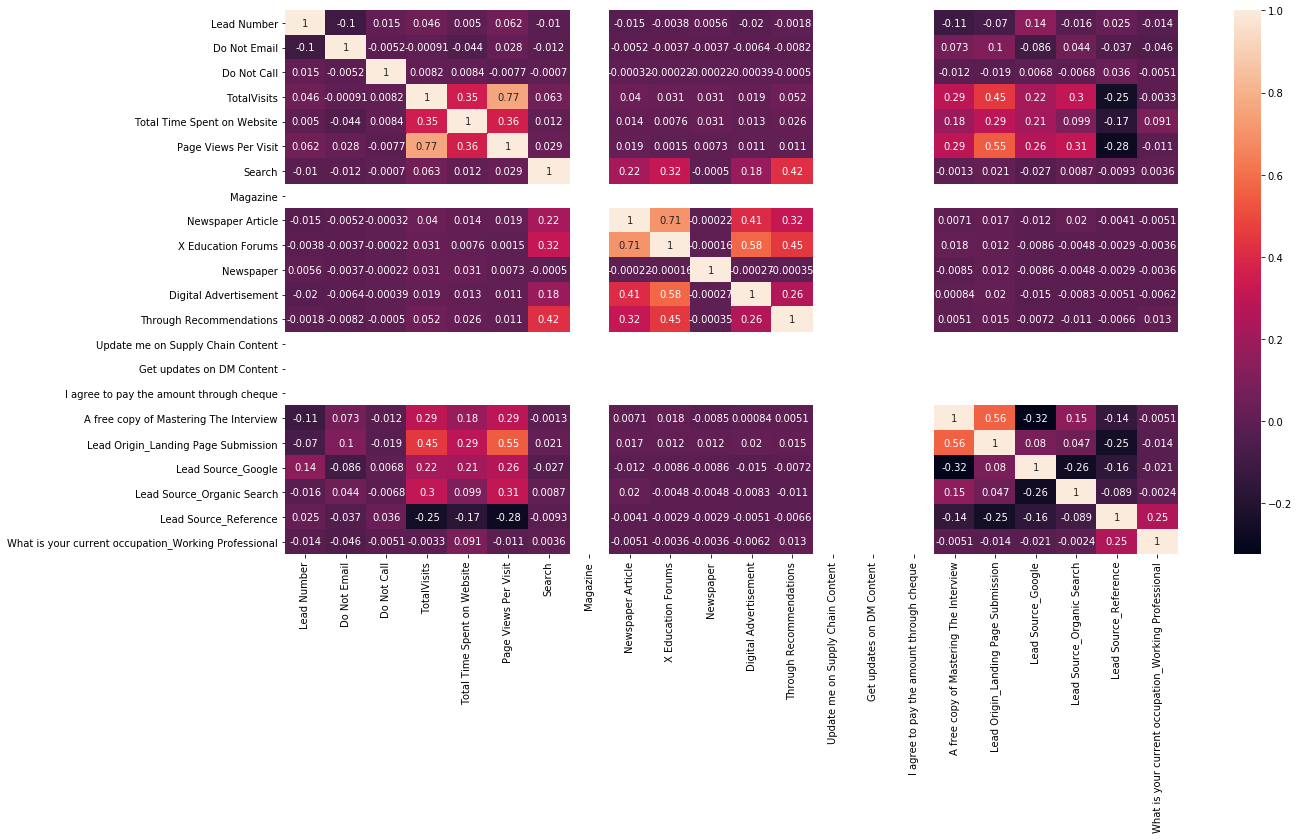

In [47]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))
sns.heatmap(X_train.corr(), annot=True)
plt.show()

Removed all the dummy variables with high correlation

### Step 8: Feature Selection Using RFE


In [48]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [49]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [50]:
rfe.support_

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True])

In [51]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Lead Number', True, 1),
 ('Do Not Email', True, 1),
 ('Do Not Call', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Search', True, 1),
 ('Magazine', False, 2),
 ('Newspaper Article', True, 1),
 ('X Education Forums', True, 1),
 ('Newspaper', True, 1),
 ('Digital Advertisement', True, 1),
 ('Through Recommendations', True, 1),
 ('Update me on Supply Chain Content', True, 1),
 ('Get updates on DM Content', False, 3),
 ('I agree to pay the amount through cheque', True, 1),
 ('A free copy of Mastering The Interview', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Reference', True, 1),
 ('What is your current occupation_Working Professional', True, 1)]

In [52]:
col = X_train.columns[rfe.support_]

In [53]:
X_train.columns[~rfe.support_]

Index(['Magazine', 'Get updates on DM Content'], dtype='object')

### Step 9: Model Building


In [54]:
import statsmodels.api as sm

In [55]:
# Model1
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3166.5
Date:                Sun, 06 Dec 2020   Deviance:                       6332.9
Time:                        00:33:38   Pearson chi2:                 6.57e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4231      0.070     -6.069      0.000      -0.560      -0.286
Lead Number                                              0.0019      0.032      0.060      0.952      -0.060       0.064
Do Not Email                                            -1.3879      0.154     -9.039      0.000      -1.689      -1.087
Do Not Call                                             19.7709   2.04e+04      0.001      0.999      -4e+04    4.01e+04
TotalVisits                                              0.1869      0.048      3.883      0.000       0.093       0.281
Total Time Spent on Website                              1.0183      0.036     28.501      0.000       0.948       1.088
Page Views Per Visit                                    -0.2555      0.054     -4.702      0.000      -0.362      -0.149
Search                                                  -0.1736      0.860     -0.202      0.840      -1.859       1.512
Newspaper Article                                       21.6753   2.92e+04      0.001      0.999   -5.73e+04    5.73e+04
X Education Forums                                     -44.2066   4.13e+04     -0.001      0.999   -8.11e+04     8.1e+04
Newspaper                                              -23.6192   2.92e+04     -0.001      0.999   -5.73e+04    5.73e+04
Digital Advertisement                                    0.3138      1.768      0.177      0.859      -3.152       3.780
Through Recommendations                                  0.7520      1.576      0.477      0.633      -2.337       3.841
Update me on Supply Chain Content                    -3.158e-11   2.66e-08     -0.001      0.999   -5.21e-08     5.2e-08
I agree to pay the amount through cheque             -2.209e-11   1.97e-08     -0.001      0.999   -3.87e-08    3.86e-08
A free copy of Mastering The Interview                  -0.2318      0.092     -2.507      0.012      -0.413      -0.051
Lead Origin_Landing Page Submission                     -0.3116      0.088     -3.535      0.000      -0.484      -0.139
Lead Source_Google                                      -0.1855      0.085     -2.184      0.029      -0.352      -0.019
Lead Source_Organic Search                              -0.2052      0.110     -1.871      0.061      -0.420       0.010
Lead Source_Reference                                    3.2856      0.223     14.706      0.000       2.848       3.723
What is your current occupation_Working Professional     2.7256      0.177     15.382      0.000       2.378       3.073
========================================================================================================================
"""

Here the column Do Not Call has a p-value of 0.999 which is insignificant for our model so we will drop the column.

In [56]:
col = col.drop(["Do Not Call"])

In [57]:
# Model 2
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3166.8
Date:                Sun, 06 Dec 2020   Deviance:                       6333.6
Time:                        00:33:38   Pearson chi2:                 6.58e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4225      0.070     -6.061      0.000      -0.559      -0.286
Lead Number                                              0.0021      0.032      0.066      0.947      -0.060       0.064
Do Not Email                                            -1.3882      0.154     -9.039      0.000      -1.689      -1.087
TotalVisits                                              0.1875      0.048      3.899      0.000       0.093       0.282
Total Time Spent on Website                              1.0187      0.036     28.513      0.000       0.949       1.089
Page Views Per Visit                                    -0.2559      0.054     -4.709      0.000      -0.362      -0.149
Search                                                  -0.1738      0.860     -0.202      0.840      -1.860       1.512
Newspaper Article                                       21.6752   2.92e+04      0.001      0.999   -5.73e+04    5.73e+04
X Education Forums                                     -44.2075   4.13e+04     -0.001      0.999   -8.11e+04     8.1e+04
Newspaper                                              -23.6214   2.92e+04     -0.001      0.999   -5.73e+04    5.73e+04
Digital Advertisement                                    0.3142      1.768      0.178      0.859      -3.152       3.780
Through Recommendations                                  0.7512      1.576      0.477      0.634      -2.338       3.840
Update me on Supply Chain Content                     5.004e-12   1.46e-07   3.43e-05      1.000   -2.86e-07    2.86e-07
I agree to pay the amount through cheque             -6.946e-11   7.55e-08     -0.001      0.999   -1.48e-07    1.48e-07
A free copy of Mastering The Interview                  -0.2318      0.092     -2.507      0.012      -0.413      -0.051
Lead Origin_Landing Page Submission                     -0.3123      0.088     -3.544      0.000      -0.485      -0.140
Lead Source_Google                                      -0.1854      0.085     -2.182      0.029      -0.352      -0.019
Lead Source_Organic Search                              -0.2057      0.110     -1.876      0.061      -0.421       0.009
Lead Source_Reference                                    3.2908      0.223     14.734      0.000       2.853       3.729
What is your current occupation_Working Professional     2.7255      0.177     15.380      0.000       2.378       3.073
========================================================================================================================
"""

Here the column I agree to pay the amount through cheque has a p-value of 1 which is insignificant for our model so we will drop the column.

In [58]:
col = col.drop(["I agree to pay the amount through cheque"])

In [59]:
# Model 3
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3166.8
Date:                Sun, 06 Dec 2020   Deviance:                       6333.6
Time:                        00:33:38   Pearson chi2:                 6.58e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4225      0.070     -6.061      0.000      -0.559      -0.286
Lead Number                                              0.0021      0.032      0.066      0.947      -0.060       0.064
Do Not Email                                            -1.3882      0.154     -9.039      0.000      -1.689      -1.087
TotalVisits                                              0.1875      0.048      3.899      0.000       0.093       0.282
Total Time Spent on Website                              1.0187      0.036     28.513      0.000       0.949       1.089
Page Views Per Visit                                    -0.2559      0.054     -4.709      0.000      -0.362      -0.149
Search                                                  -0.1738      0.860     -0.202      0.840      -1.860       1.512
Newspaper Article                                       21.6752   2.92e+04      0.001      0.999   -5.73e+04    5.73e+04
X Education Forums                                     -44.2075   4.13e+04     -0.001      0.999   -8.11e+04     8.1e+04
Newspaper                                              -23.6214   2.92e+04     -0.001      0.999   -5.73e+04    5.73e+04
Digital Advertisement                                    0.3142      1.768      0.178      0.859      -3.152       3.780
Through Recommendations                                  0.7512      1.576      0.477      0.634      -2.338       3.840
Update me on Supply Chain Content                     1.648e-10   1.53e-07      0.001      0.999      -3e-07    3.01e-07
A free copy of Mastering The Interview                  -0.2318      0.092     -2.507      0.012      -0.413      -0.051
Lead Origin_Landing Page Submission                     -0.3123      0.088     -3.544      0.000      -0.485      -0.140
Lead Source_Google                                      -0.1854      0.085     -2.182      0.029      -0.352      -0.019
Lead Source_Organic Search                              -0.2057      0.110     -1.876      0.061      -0.421       0.009
Lead Source_Reference                                    3.2908      0.223     14.734      0.000       2.853       3.729
What is your current occupation_Working Professional     2.7255      0.177     15.380      0.000       2.378       3.073
========================================================================================================================
"""

Here the column Newspaper Article has a p-value of 0.999 which is insignificant for our model so we will drop the column.

In [60]:
col = col.drop(["Newspaper Article"])

In [61]:
# Model 4
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3167.5
Date:                Sun, 06 Dec 2020   Deviance:                       6335.1
Time:                        00:33:38   Pearson chi2:                 6.58e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4213      0.070     -6.045      0.000      -0.558      -0.285
Lead Number                                              0.0013      0.032      0.041      0.967      -0.061       0.063
Do Not Email                                            -1.3893      0.154     -9.046      0.000      -1.690      -1.088
TotalVisits                                              0.1882      0.048      3.914      0.000       0.094       0.282
Total Time Spent on Website                              1.0189      0.036     28.518      0.000       0.949       1.089
Page Views Per Visit                                    -0.2553      0.054     -4.699      0.000      -0.362      -0.149
Search                                                  -0.1776      0.860     -0.206      0.836      -1.863       1.508
X Education Forums                                     -21.5266   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Newspaper                                              -22.6262   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Digital Advertisement                                    0.3100      1.769      0.175      0.861      -3.156       3.776
Through Recommendations                                  0.7523      1.577      0.477      0.633      -2.339       3.844
Update me on Supply Chain Content                    -6.315e-12   6.55e-09     -0.001      0.999   -1.29e-08    1.28e-08
A free copy of Mastering The Interview                  -0.2353      0.092     -2.547      0.011      -0.416      -0.054
Lead Origin_Landing Page Submission                     -0.3109      0.088     -3.528      0.000      -0.484      -0.138
Lead Source_Google                                      -0.1874      0.085     -2.206      0.027      -0.354      -0.021
Lead Source_Organic Search                              -0.2030      0.110     -1.852      0.064      -0.418       0.012
Lead Source_Reference                                    3.2916      0.223     14.738      0.000       2.854       3.729
What is your current occupation_Working Professional     2.7246      0.177     15.375      0.000       2.377       3.072
========================================================================================================================
"""

Here the column X Education Forums has a p-value of 0.999 which is insignificant for our model so we will drop the column.

In [62]:
col= col.drop(["X Education Forums"])

In [63]:
# Model 5
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3168.2
Date:                Sun, 06 Dec 2020   Deviance:                       6336.4
Time:                        00:33:38   Pearson chi2:                 6.58e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4198      0.070     -6.025      0.000      -0.556      -0.283
Lead Number                                              0.0011      0.032      0.035      0.972      -0.061       0.063
Do Not Email                                            -1.3902      0.154     -9.052      0.000      -1.691      -1.089
TotalVisits                                              0.1874      0.048      3.897      0.000       0.093       0.282
Total Time Spent on Website                              1.0193      0.036     28.528      0.000       0.949       1.089
Page Views Per Visit                                    -0.2539      0.054     -4.675      0.000      -0.360      -0.147
Search                                                  -0.2976      0.857     -0.347      0.728      -1.978       1.382
Newspaper                                              -22.6288   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Digital Advertisement                                   -0.6768      1.472     -0.460      0.646      -3.561       2.208
Through Recommendations                                  0.1252      1.371      0.091      0.927      -2.561       2.811
Update me on Supply Chain Content                     6.427e-11   5.04e-08      0.001      0.999   -9.86e-08    9.88e-08
A free copy of Mastering The Interview                  -0.2386      0.092     -2.584      0.010      -0.420      -0.058
Lead Origin_Landing Page Submission                     -0.3094      0.088     -3.513      0.000      -0.482      -0.137
Lead Source_Google                                      -0.1894      0.085     -2.231      0.026      -0.356      -0.023
Lead Source_Organic Search                              -0.2040      0.110     -1.861      0.063      -0.419       0.011
Lead Source_Reference                                    3.2914      0.223     14.737      0.000       2.854       3.729
What is your current occupation_Working Professional     2.7249      0.177     15.379      0.000       2.378       3.072
========================================================================================================================
"""

Here the column Newspaper has a p-value of 0.999 which is insignificant for our model so we will drop the column.

In [64]:
col = col.drop(["Newspaper"])

In [65]:
#Model 6
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3170.4
Date:                Sun, 06 Dec 2020   Deviance:                       6340.7
Time:                        00:33:38   Pearson chi2:                 6.58e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4239      0.070     -6.088      0.000      -0.560      -0.287
Lead Number                                              0.0007      0.032      0.021      0.983      -0.061       0.063
Do Not Email                                            -1.3884      0.154     -9.044      0.000      -1.689      -1.087
TotalVisits                                              0.1830      0.048      3.808      0.000       0.089       0.277
Total Time Spent on Website                              1.0166      0.036     28.492      0.000       0.947       1.087
Page Views Per Visit                                    -0.2513      0.054     -4.630      0.000      -0.358      -0.145
Search                                                  -0.2907      0.857     -0.339      0.734      -1.970       1.389
Digital Advertisement                                   -0.6714      1.471     -0.457      0.648      -3.554       2.211
Through Recommendations                                  0.1292      1.369      0.094      0.925      -2.553       2.811
Update me on Supply Chain Content                    -6.613e-16   1.49e-15     -0.443      0.658   -3.59e-15    2.27e-15
A free copy of Mastering The Interview                  -0.2315      0.092     -2.509      0.012      -0.412      -0.051
Lead Origin_Landing Page Submission                     -0.3123      0.088     -3.546      0.000      -0.485      -0.140
Lead Source_Google                                      -0.1827      0.085     -2.154      0.031      -0.349      -0.016
Lead Source_Organic Search                              -0.1991      0.110     -1.818      0.069      -0.414       0.016
Lead Source_Reference                                    3.2913      0.223     14.737      0.000       2.854       3.729
What is your current occupation_Working Professional     2.7252      0.177     15.383      0.000       2.378       3.072
========================================================================================================================
"""

Here the column Lead Number has a p-value of 0.983 which is insignificant for our model so we will drop the column.

In [66]:
col = col.drop(["Lead Number"])

In [67]:
# Model 7
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3170.4
Date:                Sun, 06 Dec 2020   Deviance:                       6340.7
Time:                        00:33:39   Pearson chi2:                 6.58e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4239      0.070     -6.094      0.000      -0.560      -0.288
Do Not Email                                            -1.3886      0.153     -9.057      0.000      -1.689      -1.088
TotalVisits                                              0.1830      0.048      3.809      0.000       0.089       0.277
Total Time Spent on Website                              1.0166      0.036     28.500      0.000       0.947       1.087
Page Views Per Visit                                    -0.2512      0.054     -4.641      0.000      -0.357      -0.145
Search                                                  -0.2909      0.857     -0.339      0.734      -1.970       1.389
Digital Advertisement                                   -0.6721      1.470     -0.457      0.648      -3.554       2.210
Through Recommendations                                  0.1297      1.368      0.095      0.925      -2.552       2.812
Update me on Supply Chain Content                     7.164e-16   2.91e-15      0.246      0.806   -4.99e-15    6.42e-15
A free copy of Mastering The Interview                  -0.2316      0.092     -2.511      0.012      -0.412      -0.051
Lead Origin_Landing Page Submission                     -0.3124      0.088     -3.558      0.000      -0.485      -0.140
Lead Source_Google                                      -0.1826      0.085     -2.158      0.031      -0.348      -0.017
Lead Source_Organic Search                              -0.1992      0.110     -1.818      0.069      -0.414       0.016
Lead Source_Reference                                    3.2914      0.223     14.748      0.000       2.854       3.729
What is your current occupation_Working Professional     2.7252      0.177     15.385      0.000       2.378       3.072
========================================================================================================================
"""

Here the column Through Recomendations has a p-value of 0.925 which is insignificant for our model so we will drop the column.

In [68]:
col = col.drop(["Through Recommendations"])

In [69]:
# Model 8
X_train_sm = sm.add_constant(X_train[col])
logm8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3170.4
Date:                Sun, 06 Dec 2020   Deviance:                       6340.7
Time:                        00:33:39   Pearson chi2:                 6.58e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4238      0.070     -6.094      0.000      -0.560      -0.288
Do Not Email                                            -1.3886      0.153     -9.057      0.000      -1.689      -1.088
TotalVisits                                              0.1831      0.048      3.814      0.000       0.089       0.277
Total Time Spent on Website                              1.0167      0.036     28.502      0.000       0.947       1.087
Page Views Per Visit                                    -0.2513      0.054     -4.643      0.000      -0.357      -0.145
Search                                                  -0.2628      0.802     -0.328      0.743      -1.835       1.310
Digital Advertisement                                   -0.6315      1.410     -0.448      0.654      -3.395       2.132
Update me on Supply Chain Content                     1.652e-15   3.67e-15      0.450      0.653   -5.54e-15    8.84e-15
A free copy of Mastering The Interview                  -0.2315      0.092     -2.510      0.012      -0.412      -0.051
Lead Origin_Landing Page Submission                     -0.3125      0.088     -3.559      0.000      -0.485      -0.140
Lead Source_Google                                      -0.1825      0.085     -2.157      0.031      -0.348      -0.017
Lead Source_Organic Search                              -0.1993      0.110     -1.820      0.069      -0.414       0.015
Lead Source_Reference                                    3.2915      0.223     14.749      0.000       2.854       3.729
What is your current occupation_Working Professional     2.7252      0.177     15.385      0.000       2.378       3.072
========================================================================================================================
"""

Here the column Update me on Supply Chain Content has a p-value of 0.753 which is insignificant for our model so we will drop the column.

In [70]:
col = col.drop(["Update me on Supply Chain Content"])

In [71]:
# Model 9
X_train_sm = sm.add_constant(X_train[col])
logm9 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm9.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3170.4
Date:                Sun, 06 Dec 2020   Deviance:                       6340.7
Time:                        00:33:39   Pearson chi2:                 6.58e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4238      0.070     -6.094      0.000      -0.560      -0.288
Do Not Email                                            -1.3886      0.153     -9.057      0.000      -1.689      -1.088
TotalVisits                                              0.1831      0.048      3.814      0.000       0.089       0.277
Total Time Spent on Website                              1.0167      0.036     28.502      0.000       0.947       1.087
Page Views Per Visit                                    -0.2513      0.054     -4.643      0.000      -0.357      -0.145
Search                                                  -0.2628      0.802     -0.328      0.743      -1.835       1.310
Digital Advertisement                                   -0.6315      1.410     -0.448      0.654      -3.395       2.132
A free copy of Mastering The Interview                  -0.2315      0.092     -2.510      0.012      -0.412      -0.051
Lead Origin_Landing Page Submission                     -0.3125      0.088     -3.559      0.000      -0.485      -0.140
Lead Source_Google                                      -0.1825      0.085     -2.157      0.031      -0.348      -0.017
Lead Source_Organic Search                              -0.1993      0.110     -1.820      0.069      -0.414       0.015
Lead Source_Reference                                    3.2915      0.223     14.749      0.000       2.854       3.729
What is your current occupation_Working Professional     2.7252      0.177     15.385      0.000       2.378       3.072
========================================================================================================================
"""

Here the column Search has a p-value of 0.743 which is insignificant for our model so we will drop the column.

In [72]:
col = col.drop(["Search"])

In [73]:
# Model 10
X_train_sm = sm.add_constant(X_train[col])
logm10 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm10.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6339
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3170.4
Date:                Sun, 06 Dec 2020   Deviance:                       6340.8
Time:                        00:33:39   Pearson chi2:                 6.58e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4247      0.070     -6.110      0.000      -0.561      -0.288
Do Not Email                                            -1.3880      0.153     -9.054      0.000      -1.688      -1.088
TotalVisits                                              0.1822      0.048      3.801      0.000       0.088       0.276
Total Time Spent on Website                              1.0167      0.036     28.502      0.000       0.947       1.087
Page Views Per Visit                                    -0.2511      0.054     -4.639      0.000      -0.357      -0.145
Digital Advertisement                                   -0.7362      1.362     -0.541      0.589      -3.405       1.933
A free copy of Mastering The Interview                  -0.2303      0.092     -2.500      0.012      -0.411      -0.050
Lead Origin_Landing Page Submission                     -0.3132      0.088     -3.567      0.000      -0.485      -0.141
Lead Source_Google                                      -0.1812      0.085     -2.144      0.032      -0.347      -0.016
Lead Source_Organic Search                              -0.1989      0.110     -1.816      0.069      -0.414       0.016
Lead Source_Reference                                    3.2916      0.223     14.749      0.000       2.854       3.729
What is your current occupation_Working Professional     2.7249      0.177     15.383      0.000       2.378       3.072
========================================================================================================================
"""

Here the column Digital Advertisement has a p-value of 0.589 which is insignificant for our model so we will drop the column.

In [74]:
col = col.drop(["Digital Advertisement"])

In [75]:
# Model 11
X_train_sm = sm.add_constant(X_train[col])
logm11 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm11.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6340
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3170.6
Date:                Sun, 06 Dec 2020   Deviance:                       6341.1
Time:                        00:33:39   Pearson chi2:                 6.58e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4257      0.069     -6.127      0.000      -0.562      -0.290
Do Not Email                                            -1.3873      0.153     -9.050      0.000      -1.688      -1.087
TotalVisits                                              0.1814      0.048      3.786      0.000       0.087       0.275
Total Time Spent on Website                              1.0163      0.036     28.499      0.000       0.946       1.086
Page Views Per Visit                                    -0.2507      0.054     -4.633      0.000      -0.357      -0.145
A free copy of Mastering The Interview                  -0.2291      0.092     -2.487      0.013      -0.410      -0.049
Lead Origin_Landing Page Submission                     -0.3141      0.088     -3.579      0.000      -0.486      -0.142
Lead Source_Google                                      -0.1795      0.084     -2.125      0.034      -0.345      -0.014
Lead Source_Organic Search                              -0.1975      0.109     -1.804      0.071      -0.412       0.017
Lead Source_Reference                                    3.2917      0.223     14.750      0.000       2.854       3.729
What is your current occupation_Working Professional     2.7252      0.177     15.386      0.000       2.378       3.072
========================================================================================================================
"""

Here the column Lead Source_Organic Search has a p-value of 0.071 which is insignificant for our model so we will drop the column.

In [76]:
col = col.drop(["Lead Source_Organic Search"])

In [77]:
# Model 12
X_train_sm = sm.add_constant(X_train[col])
logm12 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm12.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6341
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3172.2
Date:                Sun, 06 Dec 2020   Deviance:                       6344.4
Time:                        00:33:39   Pearson chi2:                 6.58e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4879      0.060     -8.077      0.000      -0.606      -0.370
Do Not Email                                            -1.3909      0.153     -9.077      0.000      -1.691      -1.091
TotalVisits                                              0.1698      0.047      3.576      0.000       0.077       0.263
Total Time Spent on Website                              1.0114      0.035     28.492      0.000       0.942       1.081
Page Views Per Visit                                    -0.2750      0.052     -5.241      0.000      -0.378      -0.172
A free copy of Mastering The Interview                  -0.2212      0.092     -2.406      0.016      -0.401      -0.041
Lead Origin_Landing Page Submission                     -0.2852      0.086     -3.309      0.001      -0.454      -0.116
Lead Source_Google                                      -0.1201      0.078     -1.545      0.122      -0.273       0.032
Lead Source_Reference                                    3.3066      0.223     14.824      0.000       2.869       3.744
What is your current occupation_Working Professional     2.7222      0.177     15.371      0.000       2.375       3.069
========================================================================================================================
"""

Here the column Lead Source_Google has a p-value of 0.122 which is insignificant for our model so we will drop the column.

In [78]:
col = col.drop(["Lead Source_Google"])

In [79]:
# Model 13
X_train_sm = sm.add_constant(X_train[col])
logm13 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm13.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6342
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3173.4
Date:                Sun, 06 Dec 2020   Deviance:                       6346.8
Time:                        00:33:39   Pearson chi2:                 6.58e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.5394      0.051    -10.675      0.000      -0.638      -0.440
Do Not Email                                            -1.3744      0.153     -9.001      0.000      -1.674      -1.075
TotalVisits                                              0.1642      0.047      3.474      0.001       0.072       0.257
Total Time Spent on Website                              1.0023      0.035     28.686      0.000       0.934       1.071
Page Views Per Visit                                    -0.2840      0.052     -5.448      0.000      -0.386      -0.182
A free copy of Mastering The Interview                  -0.1539      0.081     -1.904      0.057      -0.312       0.005
Lead Origin_Landing Page Submission                     -0.3056      0.085     -3.593      0.000      -0.472      -0.139
Lead Source_Reference                                    3.3300      0.223     14.965      0.000       2.894       3.766
What is your current occupation_Working Professional     2.7237      0.177     15.384      0.000       2.377       3.071
========================================================================================================================
"""

Here the column A free copy of Mastering The Interview has a p-value of 0.057 which is insignificant for our model so we will drop the column

In [80]:
col = col.drop(["A free copy of Mastering The Interview"])

In [81]:
# Model 13
X_train_sm = sm.add_constant(X_train[col])
logm14 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm14.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6343
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3175.2
Date:                Sun, 06 Dec 2020   Deviance:                       6350.4
Time:                        00:33:39   Pearson chi2:                 6.58e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.5442      0.050    -10.784      0.000      -0.643      -0.445
Do Not Email                                            -1.3768      0.152     -9.029      0.000      -1.676      -1.078
TotalVisits                                              0.1543      0.047      3.284      0.001       0.062       0.246
Total Time Spent on Website                              1.0003      0.035     28.665      0.000       0.932       1.069
Page Views Per Visit                                    -0.2731      0.052     -5.275      0.000      -0.375      -0.172
Lead Origin_Landing Page Submission                     -0.3850      0.074     -5.183      0.000      -0.531      -0.239
Lead Source_Reference                                    3.3333      0.223     14.977      0.000       2.897       3.769
What is your current occupation_Working Professional     2.7288      0.177     15.400      0.000       2.381       3.076
========================================================================================================================
"""

#### Checking VIF values

In [82]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [83]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Page Views Per Visit,2.67
1,TotalVisits,2.48
4,Lead Origin_Landing Page Submission,1.34
5,Lead Source_Reference,1.21
2,Total Time Spent on Website,1.20
6,What is your current occupation_Working Profes...,1.16
0,Do Not Email,1.10


Since we have all VIFs and p-values are less than 5 and 0.05, all the variables are significant and hence we can proceed to make predictions.

In [84]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.247147
1012    0.464612
9226    0.220145
4750    0.666001
7987    0.760376
1281    0.518513
2880    0.126589
4971    0.732204
7536    0.817375
1248    0.711950
dtype: float64

In [85]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.2471466 , 0.46461187, 0.22014522, 0.66600057, 0.76037551,
       0.51851262, 0.12658919, 0.73220357, 0.81737472, 0.71195013])

#### Creating a dataframe with the actual Converted and the predicted probabilities

In [86]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,0,0.247147,3009
1,0,0.464612,1012
2,0,0.220145,9226
3,1,0.666001,4750
4,1,0.760376,7987


In [87]:
y_train_pred_final['Converted_Prob'] = y_train_pred

##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [88]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted
0,0,0.247147,3009,0
1,0,0.464612,1012,0
2,0,0.220145,9226,0
3,1,0.666001,4750,1
4,1,0.760376,7987,1


#### Confusion metrics

In [89]:
from sklearn import metrics

In [90]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3444  461]
 [ 982 1464]]


In [91]:
# Predicted      not_converted  converted
# Actual
# not_converted        3444       461
# converted            982       1464  

In [92]:
# Let's check the overall accuracy.
print("Accuracy Score -", metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Accuracy Score - 0.7727916863486065


We have achieved an accuracy score of 0.77. Which is quite good.

## Metrics beyond simply accuracy

In [93]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [94]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.598528209321341

In [95]:
# Let us calculate specificity
TN / float(TN+FP)

0.8819462227912932

In [96]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.11805377720870679


In [97]:
# positive predictive value 
print (TP / float(TP+FP))

0.7605194805194805


In [98]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7781292363307727


In [158]:
#Precision 
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7605194805194805

In [160]:
# Recall Score
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.598528209321341

### Step 9: Plotting the ROC Curve

In [99]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [100]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

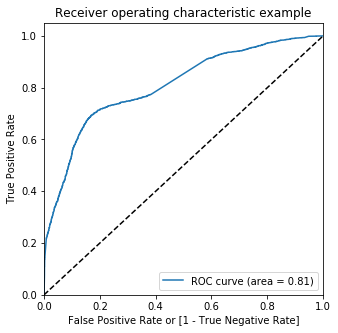

In [101]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Step 10: Finding Optimal Cutoff Point

In [102]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.247147,3009,0,1,1,1,0,0,0,0,0,0,0
1,0,0.464612,1012,0,1,1,1,1,1,0,0,0,0,0
2,0,0.220145,9226,0,1,1,1,0,0,0,0,0,0,0
3,1,0.666001,4750,1,1,1,1,1,1,1,1,0,0,0
4,1,0.760376,7987,1,1,1,1,1,1,1,1,1,0,0


In [103]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.435679  0.992232  0.087068
0.2   0.2  0.578806  0.932543  0.357234
0.3   0.3  0.757676  0.724448  0.778489
0.4   0.4  0.779720  0.673753  0.846095
0.5   0.5  0.772792  0.598528  0.881946
0.6   0.6  0.754842  0.504906  0.911396
0.7   0.7  0.729964  0.386345  0.945198
0.8   0.8  0.707605  0.279231  0.975928
0.9   0.9  0.668556  0.143908  0.997183


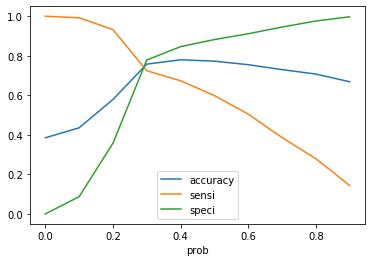

In [104]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [105]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.247147,3009,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.464612,1012,0,1,1,1,1,1,0,0,0,0,0,1
2,0,0.220145,9226,0,1,1,1,0,0,0,0,0,0,0,0
3,1,0.666001,4750,1,1,1,1,1,1,1,1,0,0,0,1
4,1,0.760376,7987,1,1,1,1,1,1,1,1,1,0,0,1


In [106]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7576759565422768

In [107]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3040,  865],
       [ 674, 1772]], dtype=int64)

In [ ]:
# Predicted      not_converted  converted
# Actual
# not_converted        3040       865
# converted             674      1772  

In [108]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [109]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7244480784955029

In [110]:
# Let us calculate specificity
TN / float(TN+FP)

0.7784891165172856

In [111]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.22151088348271447


In [112]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6719757299962078


In [113]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8185245018847603


## Precision and Recall

In [156]:
##### Precision = TP / TP + FP
confusion2[1,1]/(confusion2[0,1]+confusion2[1,1])

0.6645161290322581

In [157]:
##### Recall = TP / TP + FN
confusion2[1,1]/(confusion2[1,0]+confusion2[1,1])

0.7290192113245703

### Precision and recall tradeoff

In [120]:
from sklearn.metrics import precision_recall_curve

In [121]:

y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    1
 6349    0
 6350    0
 Name: predicted, Length: 6351, dtype: int64)

In [122]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

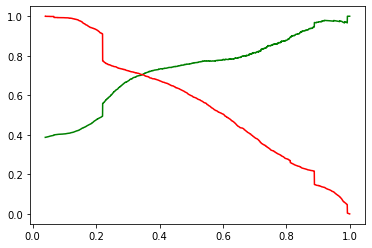

In [123]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Step 11: Making predictions on the test set

In [124]:
X_test[['Lead Number', 'Page Views Per Visit', 'Total Time Spent on Website',
         'TotalVisits']] = scaler.transform(X_test[['Lead Number', 'Page Views Per Visit', 'Total Time Spent on Website',
         'TotalVisits']])

In [125]:
X_test = X_test[col]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Source_Reference,What is your current occupation_Working Professional
3271,0,0.284772,-0.600595,0.955505,0,0,0
1490,0,0.643547,1.887326,1.510766,1,0,1
7936,0,-0.432779,-0.752879,-0.155018,0,0,0
4216,0,-1.150329,-0.888650,-1.265540,0,1,0
3830,0,1.719873,-0.587751,2.066027,1,0,0


In [126]:
X_test_sm = sm.add_constant(X_test)

In [127]:
y_test_pred = res.predict(X_test_sm)

In [128]:
y_test_pred[:10]

3271    0.203920
1490    0.966884
7936    0.210543
4216    0.887801
3830    0.139903
1800    0.749413
6507    0.154197
4821    0.356441
4223    0.887801
4714    0.220145
dtype: float64

In [129]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [130]:
# Let's see the head
y_pred_1.head()

,0
3271,0.203920
1490,0.966884
7936,0.210543
4216,0.887801
3830,0.139903


In [131]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [132]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [133]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [134]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [135]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.203920
1,1,1490,0.966884
2,0,7936,0.210543
3,1,4216,0.887801
4,0,3830,0.139903


In [136]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [137]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,Prospect ID,Converted_Prob
0,0,3271,0.203920
1,1,1490,0.966884
2,0,7936,0.210543
3,1,4216,0.887801
4,0,3830,0.139903


In [138]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)
y_pred_final.head()

,Converted,Prospect ID,Converted_Prob,final_predicted
0,0,3271,0.203920,0
1,1,1490,0.966884,1
2,0,7936,0.210543,0
3,1,4216,0.887801,1
4,0,3830,0.139903,0


In [139]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7679030481087037

In [140]:
# Let's check the recall score.
metrics.recall_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7290192113245703

In [141]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1370,  364],
       [ 268,  721]], dtype=int64)

In [142]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [143]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7290192113245703

In [144]:
# Let us calculate specificity
TN / float(TN+FP)

0.790080738177624

In [145]:
#final Score
y_pred_final["Converted_Prob"] = y_pred_final["Converted_Prob"].apply(lambda x: x*100)

In [146]:
y_pred_final.head()

,Converted,Prospect ID,Converted_Prob,final_predicted
0,0,3271,20.392001,0
1,1,1490,96.688354,1
2,0,7936,21.054314,0
3,1,4216,88.780096,1
4,0,3830,13.990299,0
